Here we take stock price data for Tesla and plot out a candlestick graph (displays ohlc info). I downloaded the Tesla data from yahoo and then saved it as a csv. In the next document I'll write coade to automate this process for multiple companies.

In [12]:
import datetime as dt

import pandas as pd




import matplotlib.pyplot as plt
from matplotlib import style
import mplfinance as mpf 
#the mplfinance module and it's predecessors (used to be a part of matplotlib) have been through a lot of 
#changes recently for the docs and other info got to https://github.com/matplotlib/mpl-finance.
import matplotlib.dates as mdates



style.use('ggplot') #arbitrary style choice, but apparently this emulates the ggplot package in R.



In [13]:
df = pd.read_csv('tsla.csv', parse_dates =True, index_col=0) 
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


Let's plot again, but first recall our time-series data is currently daily; let's assume we don't care that much about the daily prices, so we'll 'resample' the time series with a window of say 10 days (i.e. we'll graph the data every 10 data points) using the resample function from pandas and then tack on some aggregate function.

In [14]:
df_mean = df['Adj Close'].resample(rule='10D').mean() 
#the rule is the new rule we'll resample our data by, I put 10 days.
#I must then aggregate this by some aggregate function, I choose mean here.

#Note: the object I'm resampling must be a DateTime object.


#TO BE CLEAR: You can see below the index is every 10 days.
              
#             The above is calculating the mean every 10 days and displaying that
#             (e.g the value below for 2010-07-09 takes the Adjusted Close values for the previous 
#             10 days and calculated the mean and displays that).



df_mean

Date
2010-06-29      3.950000
2010-07-09      3.765333
2010-07-19      4.173500
2010-07-29      4.127429
2010-08-08      3.725143
                 ...    
2020-08-05    301.168495
2020-08-15    388.908997
2020-08-25    444.183998
2020-09-04    371.773999
2020-09-14    428.837502
Freq: 10D, Name: Adj Close, Length: 374, dtype: float64

Now we'll do the same as above but we'll use a different aggregate function. We'll use the .ohlc() function (ohlc = open, high, low, close).

What does it mean to resample (the Adj Close column), with a rule of 10 days, with respect to the .ohlc() function?:

For a given date, you take the adj close values for the previous 10 days and figure out the open (the Adj Close value at the beginning of the 10day period), the high (the highest Adj Close value over this 10 day period), the low (the lowest Adj Close value over this 10 day period), the close (the Adj Close value on the last day of the 10day period). So the index here is the end-date of this 10 day period.

It returns a DataFrame with the index as the end date of every 10 day period and it has columns 'open', 'high', 'low' and 'close' which for each date display the value described in the previous paragraph. 




In [15]:
df_ohlc = df['Adj Close'].resample(rule='10D').ohlc()

Next we resample every 10days over the 'Volume' column but using the sum() function as the aggregate. As you may guess, the sum takes the values of Volume in the previous 10 days and adds it together. Again the index is the end-date of the 10day periods


In [16]:
df_volume = df['Volume'].resample(rule='10D').sum()
df_volume.head()

Date
2010-06-29    354060000.0
2010-07-09     97447500.0
2010-07-19     45924000.0
2010-07-29     27213000.0
2010-08-08     25751500.0
Freq: 10D, Name: Volume, dtype: float64

Now we're going to plot ohlc info in candlestick form using mplfinance.

In [17]:
df_ohlc

,open,high,low,close
Date,,,,
2010-06-29,4.778000,4.778000,3.160000,3.492000
2010-07-09,3.480000,4.128000,3.410000,4.128000
2010-07-19,4.382000,4.382000,4.044000,4.144000
2010-07-29,4.070000,4.390000,3.918000,3.918000
2010-08-08,3.920000,3.920000,3.520000,3.830000
...,...,...,...,...
2020-08-05,297.003998,330.141998,274.877991,330.141998
2020-08-15,367.127991,409.996002,367.127991,402.839996
2020-08-25,404.667999,498.320007,404.667999,407.000000


In [18]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

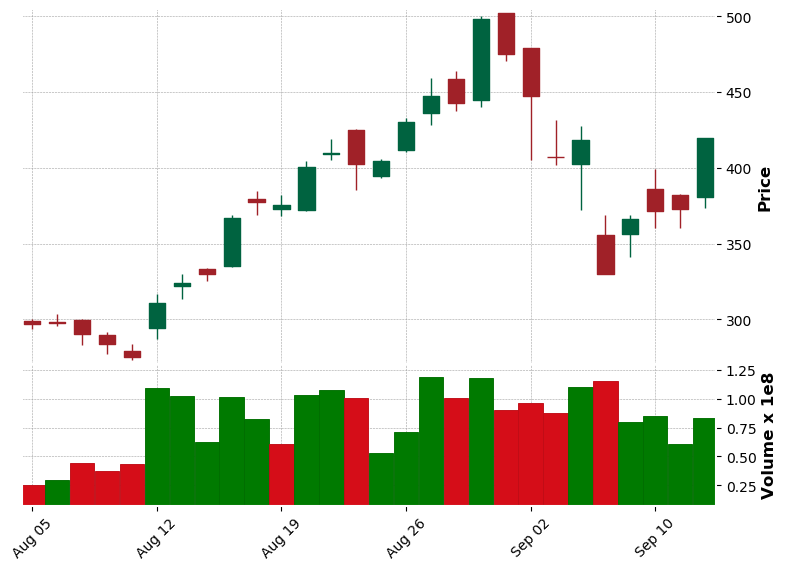

In [19]:
df_recent = df.loc['2020-08-05':'2020-09-14']

mpf.plot(df_recent, type='candle', volume=True, style='charles', tight_layout=True)

#volume=True means it detects and includes the volume column from the DataFrame
#tight_layout=True means the graph is made to fit the figure size.
#note you can scale the size of the figure by figscale=. The default you see here is 1. 